
<p><img align="left" src="https://www.cqf.com/themes/custom/creode/logo.svg" style="vertical-align: top; padding-top: 23px;" width="10%"/>
<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" style="vertical-align: middle;" width="12%"/>
<font color="#306998"><h1><center>Python Labs</center></h1></font></p>
<p></p><h1><center>Modeling Returns</center></h1>
<center><b>Kannan Singaravelu</b></center>
<center>kannan.singaravelu@fitchlearning.com</center>



<h2 id="Normal-Distribution">Normal Distribution<a class="anchor-link" href="#Normal-Distribution">¶</a></h2>



Normal Distribution, also known as Gaussian distribution is one of the most widely assumed distribution in Data Science. A normal distribution has a bell-shaped density curve described by its mean $ \mu $ and standard deviation $\sigma$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation.
The probability distribution function of a normal density curve with mean $\mu$ and standard deviation $\sigma$ at a given point x is given by:
$$ 
f(x\space|\space\mu,\sigma^2)=\frac1{\sqrt{2\pi\sigma^2}} \ e^\frac{-(x-\mu)^2}{2\sigma^2} 
$$



<h3 id="Import-Libraries">Import Libraries<a class="anchor-link" href="#Import-Libraries">¶</a></h3><p>We'll import the required libraries that we'll use in this example.</p>


In [1]:

# Import Pandas, Numpy and Scipy
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

# Set the runtime configuration (rc)
plt.style.use('dark_background')

rcParams['figure.figsize'] = 8, 6
rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'medium'
rcParams['figure.titlesize'] = 'medium'




<h3 id="Load-SPX-Data">Load SPX Data<a class="anchor-link" href="#Load-SPX-Data">¶</a></h3>


In [2]:
import os
os.getcwd()

'c:\\Users\\EasyTech\\Desktop\\CQF\\M2\\Python Lab\\M2 binomial model pythonlab补充材料'

In [3]:

# Load the CSV file
spx = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True, dayfirst=True)  
# spx = pd.read_excel('data/SP500.xlsx', index_col=0, parse_dates=True)

# Output first five values
spx.head()



FileNotFoundError: [Errno 2] No such file or directory: 'data/spx.csv'

In [4]:

# Make sure the index datatype is in a proper datetime format
spx.index



DatetimeIndex(['1928-01-03', '1928-01-04', '1928-01-05', '1928-01-06',
               '1928-01-09', '1928-01-10', '1928-01-11', '1928-01-12',
               '1928-01-13', '1928-01-16',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='Date', length=23371, freq=None)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


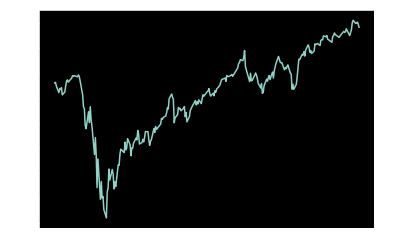

In [5]:

# Verify the datetime format
plt.plot(spx.index[-250:],spx[-250:])



C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5,0,'Year')

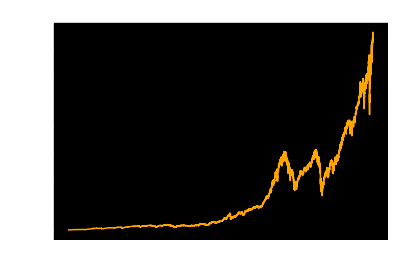

In [6]:

# Slice the DataFrame to get values from 1950
spx = spx['1950':]

# Visualize the plot to verify the data
plt.plot(spx.index, spx, color='orange')
plt.title('SPX : 1950 - 2020')
plt.ylabel('Price $')
plt.xlabel('Year')



In [7]:

# Calculate returns and add it to existing DataFrame as a column
spx['Return'] = spx.pct_change().fillna(0)

# Get first 5 rows
spx.head()



,Adj Close,Return
Date,,
1950-01-03,16.66,0.000000
1950-01-04,16.85,0.011405
1950-01-05,16.93,0.004748
1950-01-06,16.98,0.002953
1950-01-09,17.08,0.005889


In [8]:

spx['Return']



Date
1950-01-03    0.000000
1950-01-04    0.011405
1950-01-05    0.004748
1950-01-06    0.002953
1950-01-09    0.005889
                ...   
2021-01-11   -0.006555
2021-01-12    0.000416
2021-01-13    0.002276
2021-01-14   -0.003753
2021-01-15   -0.007190
Name: Return, Length: 17876, dtype: float64

In [9]:

# Calculate mean and sigma
mu = np.mean(spx['Return'])
sigma = np.std(spx['Return'])

print(f'Mean {mu:.6f}, Sigma {sigma:.6f}')



Mean 0.000352, Sigma 0.009875


In [10]:

# Calculate the scaled return
spx['Scaled_Return'] = spx['Return'].apply(lambda x: (x-mu)/sigma)

# Check the output
spx.head()



,Adj Close,Return,Scaled_Return
Date,,,
1950-01-03,16.66,0.000000,-0.035680
1950-01-04,16.85,0.011405,1.119230
1950-01-05,16.93,0.004748,0.445115
1950-01-06,16.98,0.002953,0.263397
1950-01-09,17.08,0.005889,0.560712


In [11]:

# Calculate minimum and maximum bin range
sr_min = np.min(spx['Scaled_Return'])
sr_max = np.max(spx['Scaled_Return'])

print(f'Minimum {sr_min:.6f}, Maximum {sr_max:.6f}')



Minimum -20.761999, Maximum 11.691117


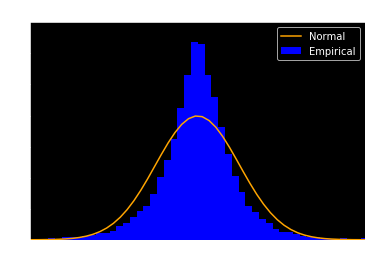

In [12]:

# Define bins
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)) # can also use norm.pdf(x,0,1) 
# y1 = norm.pdf(x,0,1) 
# Plot histogram of scaled returns
plt.hist(spx['Scaled_Return'], bins=200, density=True, color = 'blue', label = 'Empirical', alpha=1)

# Plot norm pdf
plt.plot(x, y, color = 'orange', label = 'Normal', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend();




<h2 id="References">References<a class="anchor-link" href="#References">¶</a></h2><ul>
<li><p>Numpy documentation <a href="https://docs.scipy.org/doc/numpy/">https://docs.scipy.org/doc/numpy/</a></p>
</li>
<li><p>Scipy documentation <a href="https://scipy.org/">https://scipy.org/</a></p>
</li>
<li><p>Paul Wilmott (2007), Paul Wilmott introduces Quantitative Finance</p>
</li>
</ul>
